### Introduction to Geospatial Data Science with Milan Jasonov

##### Geospatial Data is any kind of information that is linked to a specific location on earth

It consists of Data definition, Data Values and Location attributes

#### Location Intelligence, turning geospatial data into insights
Deriving insights from processing, analyzing, and visualizing geospatial data

##### Process of Location Intelligence
* Define the location-related use case
* Acquire and process data (free and proprietary)
* Develop models (Data Science)
* Get insights (BI)

##### Geospatial Data Sources (Both Vector[Points, lines, polygons] and Raster[pixel maps])
* Digital maps
* Demographic data
* Housing
* Environmental data
* Traffic 
* Health care
* INfrastructure data

##### Applications/ Use Cases
* Urban planning and development
* Business and market analysis
* Natural Resource management
* Risk assessment
* Emergency response and disaster management
* Transportaion and logistics
* Healthcare


In [1]:
#### Inro to Geopandas
### Key features of Geopandas

## Geospatial Data Structures
# GeoSeries: an extended version of pandas series for geometric data
# GeoDataframe 

## Spatial Operations
# Supports geometric operations like intersection, union, difference and distance calculations

## File Input and OUtput of different file types



In [1]:
### Onboarding to GeoPandas

import geopandas as silas

In [2]:
silas.__version__

'1.0.1'

In [3]:
import geodatasets

In [4]:
silas.datasets.available

[]

In [5]:
nybb =silas.read_file(geodatasets.get_path('nybb'))

In [6]:
nybb

#the geometry column makes this dataset have geospatial attributes

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [7]:
print(type(nybb))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [8]:
len(nybb)

5

In [9]:
nybb.keys()

Index(['BoroCode', 'BoroName', 'Shape_Leng', 'Shape_Area', 'geometry'], dtype='object')

In [10]:
# What are Geometries

# Shapely library manipulates geometries, and it is compatible with gdfs
## Types of geometry 
### Level one are points and multipoints
### Level two Linestring, LinearRing[Start and end point are same eg boundaries], multiline strings
### Level three Polygons, multipolygons, and geometry collection[contains any type wrapped into a single one]

#/* Basic Geometries */#

import shapely

In [11]:
shapely.__version__

'2.0.6'

In [12]:
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

In [13]:
pt = Point(23, 7)

In [14]:
type(pt)

shapely.geometry.point.Point

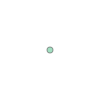

In [15]:
pt

In [16]:
print(pt)

POINT (23 7)


In [17]:
### Creating a Linestring

pt1 = Point(0.0, 0.0)
pt2 = Point(3.78, 6.89)

pts = [pt1, pt2]

In [18]:
line = LineString(pts)

In [19]:
print(type(line))

<class 'shapely.geometry.linestring.LineString'>


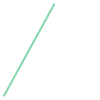

In [20]:
line

In [21]:
print(line)

LINESTRING (0 0, 3.78 6.89)


In [22]:
line.length

7.858784893353424

In [23]:
### Creating a Polygon

tp = Point(0, 0)
tp2 = Point(0, 1)
tp3 = Point(1, 1)
tp4 = Point(1, 0)

tps = [tp, tp2, tp3, tp4]

In [24]:
plg = Polygon(tps)

In [25]:
type(plg)

shapely.geometry.polygon.Polygon

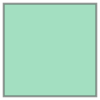

In [26]:
plg

In [27]:
print(plg)

POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))


In [28]:
plg.length

4.0

In [29]:
plg.area

1.0

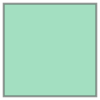

In [30]:
### Creating Multi Geometries

square = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])

square

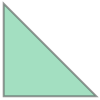

In [31]:
triangle = Polygon([(1, 0), (1, 1), (2, 0)])

triangle

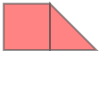

In [32]:
# Having fun with the two shapes

multippolygon = MultiPolygon([square, triangle])

multippolygon

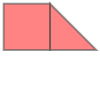

In [33]:
multippolygon2 = MultiPolygon([triangle, square])

multippolygon2

In [34]:
##Interesting??

multippolygon.area

1.5

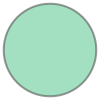

In [35]:
#### Geometry Operations


pt_buffer = pt.buffer(.2)
pt_buffer

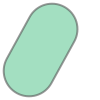

In [36]:
line_buffer = line.buffer(4.2)
line_buffer

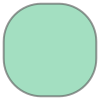

In [37]:
square_buffer = square.buffer(2.2)
square_buffer

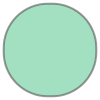

In [38]:
square_buffer = square.buffer(10)
square_buffer

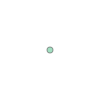

In [39]:
### See how buffer size can distort original shapes eg square to circle

center_line = line.centroid
center_line

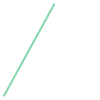

In [40]:
#### Convex Hull creation

line_hull = line.convex_hull
line_hull

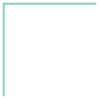

In [41]:
new_linee = LineString([(0, 0), (0, 1), (1, 1)])
new_linee


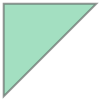

In [42]:
new_linee_hull = new_linee.convex_hull
new_linee_hull

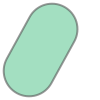

In [43]:
line_buffer.convex_hull

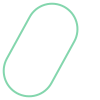

In [44]:
line_buffer.boundary

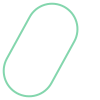

In [45]:
line_buffer.exterior

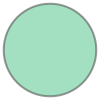

In [46]:
### Set Operations on geometries

circ = Point(0, 0).buffer(2)
circ2 = Point(3, 0).buffer(2)
circ

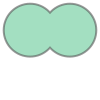

In [47]:
circ.union(circ2)

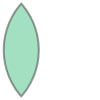

In [48]:
circ.intersection(circ2)

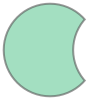

In [49]:
circ.difference(circ2)

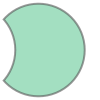

In [50]:
circ2.difference(circ)

In [51]:
## The within command

pt4 = Point(0, 0)
tri4 = Polygon([(-1, -1), (0, 1), (1, -1)])
tri5 = Polygon([(3, 4), (5, 16), (10, 10)])

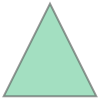

In [52]:
tri4

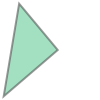

In [53]:
tri5

In [54]:
pt4.within(tri4)

True

In [55]:
pt4.within(tri5)

False

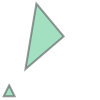

In [56]:
pt4.union(tri4).union(tri5)

In [57]:
### Measuring Distance

pt4.distance(tri4)

0.0

In [58]:
pt4.distance(tri5)

5.0

### Challenge: Creating a Simple Car Shape

In this exciting learning challenge, you'll dive into geometries in Python to create the shape of a simple car using basic geometric operations. Just like a car mechanic assembling pieces to create a real one, you will use geometric shapes and operations to create car parts and build a car model.

Throughout this challenge, you will work with simple geometric shapes like rectangles and circles and apply operations such as buffering and union to combine these shapes into a car.

##### To get started: Open your Python environment and follow the instructions below.

* Understanding and preprocessing the data: You'll start by importing the necessary libraries and setting up the geometric shapes

* Creating the car components:Define the top of the car using a rectangle with a height of 1 and a length of 

* Define the bottom part of the car using another rectangle with a height of 1 and a length of 5Create the wheels as circles with a radius of 0.5 each. Remember, you can easily create a circle by buffering a point

* Combining the shapes: Use geometric operations to combine the car parts into a single shape

* Evaluating the results:Calculate the circumference and the total area of the car when taken as a single polygonWhat You'll Learn*

By the end of this challenge, you'll have gained practical skills in using geometric operations to create complex shapes from simple components. This is a hands-on opportunity to apply computational geometry techniques in a fun and engaging way, and get you ready to manually create and modify real-world geometry objects whenever needed. 

##### Hints on How to Proceed Ensure correct shapes and positions: 
* Make sure the shapes are correctly defined and positioned to resemble a car
* Use appropriate geometry operations: 
* Use buffering to create circles for the wheels and union operations to combine shapesEvaluate the results accurately: 
* Use built-in methods to calculate the circumference and area of the final shape

Ready to begin? Here is a quick seed for the code. Copy and paste this into your own Jupyter notebook.


In [59]:
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

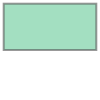

In [60]:
top1 = Polygon([(0, 1), (0, 2), (2, 2), (2, 1)])
top1

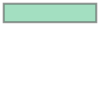

In [61]:
bottom1 = Polygon([(-1, 0), (-1, 1), (4, 1), (4, 0)])
bottom1

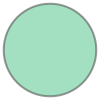

In [62]:
# wheels
front1 = Point(0, -0.25).buffer(0.25)
front2 = Point(3, -0.25).buffer(0.25)
front2

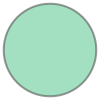

In [63]:
front3 = Point(0, -0.5).buffer(0.5)
front4 = Point(3, -0.5).buffer(0.5)
front4

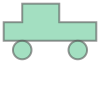

In [64]:
car = top1.union(bottom1).union(front3).union(front4)

car

### Creating Our First GDF from Scratch

In [65]:
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

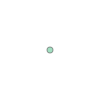

In [66]:
pt7 = Point(0, 0)
pt7

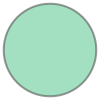

In [67]:
circ4 = Point(1, 1).buffer(.5)

circ4

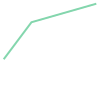

In [68]:
l3 = LineString([(2, 2), (3.5, 4), (7, 5)])

l3

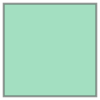

In [69]:
sq3 = Polygon([(3, 0), (3, 1), (4, 1), (4, 0)])

sq3

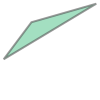

In [70]:
tri3 = LineString([(2, 2+1.5), (3.5, 4+1.5), (7, 5+1.5)]).convex_hull

tri3

In [71]:
### Creating the geodataframe

geo_data = {
    'point': pt7,
    'circle': circ4,
    'line': l3,
    'square': sq3,
    'triangle': tri3
}

geo_data

{'point': <POINT (0 0)>,
 'circle': <POLYGON ((1.5 1, 1.498 0.951, 1.49 0.902, 1.478 0.855, 1.462 0.809, 1.441 0...>,
 'line': <LINESTRING (2 2, 3.5 4, 7 5)>,
 'square': <POLYGON ((3 0, 3 1, 4 1, 4 0, 3 0))>,
 'triangle': <POLYGON ((2 3.5, 3.5 5.5, 7 6.5, 2 3.5))>}

In [72]:
geo_data.keys()

dict_keys(['point', 'circle', 'line', 'square', 'triangle'])

In [73]:
geo_data.values()

dict_values([<POINT (0 0)>, <POLYGON ((1.5 1, 1.498 0.951, 1.49 0.902, 1.478 0.855, 1.462 0.809, 1.441 0...>, <LINESTRING (2 2, 3.5 4, 7 5)>, <POLYGON ((3 0, 3 1, 4 1, 4 0, 3 0))>, <POLYGON ((2 3.5, 3.5 5.5, 7 6.5, 2 3.5))>])

In [74]:
mygdf = silas.GeoDataFrame(geo_data.items(), columns=['geo_name', 'geometry'])

mygdf

,geo_name,geometry
0,point,POINT (0 0)
1,circle,"POLYGON ((1.5 1, 1.49759 0.95099, 1.49039 0.90..."
2,line,"LINESTRING (2 2, 3.5 4, 7 5)"
3,square,"POLYGON ((3 0, 3 1, 4 1, 4 0, 3 0))"
4,triangle,"POLYGON ((2 3.5, 3.5 5.5, 7 6.5, 2 3.5))"


In [75]:
geo_data2 = {
    'circle': circ4,
    'line': l3,
    'square': sq3,
    'triangle': tri3
}

geo_data2

mygdf2 = silas.GeoDataFrame(geo_data2.items(), columns=['geo_name', 'geometry'])

In [76]:
mygdf2.to_file('mygdf.gpkg', driver='GPKG')

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [77]:
### Simple Functions and Computations

mygdf

,geo_name,geometry
0,point,POINT (0 0)
1,circle,"POLYGON ((1.5 1, 1.49759 0.95099, 1.49039 0.90..."
2,line,"LINESTRING (2 2, 3.5 4, 7 5)"
3,square,"POLYGON ((3 0, 3 1, 4 1, 4 0, 3 0))"
4,triangle,"POLYGON ((2 3.5, 3.5 5.5, 7 6.5, 2 3.5))"


In [78]:
mygdf['geometry_type'] = mygdf['geometry'].apply(lambda x: type(x).__name__)

mygdf

,geo_name,geometry,geometry_type
0,point,POINT (0 0),Point
1,circle,"POLYGON ((1.5 1, 1.49759 0.95099, 1.49039 0.90...",Polygon
2,line,"LINESTRING (2 2, 3.5 4, 7 5)",LineString
3,square,"POLYGON ((3 0, 3 1, 4 1, 4 0, 3 0))",Polygon
4,triangle,"POLYGON ((2 3.5, 3.5 5.5, 7 6.5, 2 3.5))",Polygon


In [79]:
## Creating a new column for the area of the geometry
mygdf['geometry_area'] = mygdf['geometry'].apply(lambda x: x.area)

In [80]:
## Creating a new column for the length of the geometry buffer of .78
mygdf['geometry_buffer'] = mygdf['geometry'].apply(lambda x: x.buffer(.78))

mygdf

,geo_name,geometry,geometry_type,geometry_area,geometry_buffer
0,point,POINT (0 0),Point,0.000000,"POLYGON ((0.78 0, 0.77624 -0.07645, 0.76501 -0..."
1,circle,"POLYGON ((1.5 1, 1.49759 0.95099, 1.49039 0.90...",Polygon,0.784137,"POLYGON ((2.27906 1.03827, 2.27906 0.96173, 2...."
2,line,"LINESTRING (2 2, 3.5 4, 7 5)",LineString,0.000000,"POLYGON ((2.876 4.468, 2.92201 4.52376, 2.9729..."
3,square,"POLYGON ((3 0, 3 1, 4 1, 4 0, 3 0))",Polygon,1.000000,"POLYGON ((3 -0.78, 2.92355 -0.77624, 2.84783 -..."
4,triangle,"POLYGON ((2 3.5, 3.5 5.5, 7 6.5, 2 3.5))",Polygon,2.750000,"POLYGON ((2.40131 2.83116, 2.33367 2.79497, 2...."


In [81]:
## Creating a new column for the area of the geometry in acres
mygdf['geom_area_in_acres'] = mygdf['geometry'].apply(lambda x: x.area/4046.86)

mygdf

,geo_name,geometry,geometry_type,geometry_area,geometry_buffer,geom_area_in_acres
0,point,POINT (0 0),Point,0.000000,"POLYGON ((0.78 0, 0.77624 -0.07645, 0.76501 -0...",0.000000
1,circle,"POLYGON ((1.5 1, 1.49759 0.95099, 1.49039 0.90...",Polygon,0.784137,"POLYGON ((2.27906 1.03827, 2.27906 0.96173, 2....",0.000194
2,line,"LINESTRING (2 2, 3.5 4, 7 5)",LineString,0.000000,"POLYGON ((2.876 4.468, 2.92201 4.52376, 2.9729...",0.000000
3,square,"POLYGON ((3 0, 3 1, 4 1, 4 0, 3 0))",Polygon,1.000000,"POLYGON ((3 -0.78, 2.92355 -0.77624, 2.84783 -...",0.000247
4,triangle,"POLYGON ((2 3.5, 3.5 5.5, 7 6.5, 2 3.5))",Polygon,2.750000,"POLYGON ((2.40131 2.83116, 2.33367 2.79497, 2....",0.000680


In [82]:
mygdf['geom_area_in_acres'].sum()

0.001120408692822703

In [83]:
mygdf['geom_area_in_acres'].mode()

0    0.0
Name: geom_area_in_acres, dtype: float64

In [84]:
mygdf['geom_area_in_acres'].max()

0.0006795391982920091

In [85]:
mygdf['geom_length'] = [g.length for g in mygdf['geometry'].to_list()]
mygdf['geom_area'] = [g.area for g in mygdf['geometry'].to_list()]

mygdf

,geo_name,geometry,geometry_type,geometry_area,geometry_buffer,geom_area_in_acres,geom_length,geom_area
0,point,POINT (0 0),Point,0.000000,"POLYGON ((0.78 0, 0.77624 -0.07645, 0.76501 -0...",0.000000,0.000000,0.000000
1,circle,"POLYGON ((1.5 1, 1.49759 0.95099, 1.49039 0.90...",Polygon,0.784137,"POLYGON ((2.27906 1.03827, 2.27906 0.96173, 2....",0.000194,3.140331,0.784137
2,line,"LINESTRING (2 2, 3.5 4, 7 5)",LineString,0.000000,"POLYGON ((2.876 4.468, 2.92201 4.52376, 2.9729...",0.000000,6.140055,0.000000
3,square,"POLYGON ((3 0, 3 1, 4 1, 4 0, 3 0))",Polygon,1.000000,"POLYGON ((3 -0.78, 2.92355 -0.77624, 2.84783 -...",0.000247,4.000000,1.000000
4,triangle,"POLYGON ((2 3.5, 3.5 5.5, 7 6.5, 2 3.5))",Polygon,2.750000,"POLYGON ((2.40131 2.83116, 2.33367 2.79497, 2....",0.000680,11.971007,2.750000


In [86]:
# # Deleting some redundant columns

# mygdf.drop(columns=['geometry_area_in_acres'], inplace=True)

# mygdf

In [87]:
mygdf.drop(columns=['geometry_area'], inplace=True)

mygdf

,geo_name,geometry,geometry_type,geometry_buffer,geom_area_in_acres,geom_length,geom_area
0,point,POINT (0 0),Point,"POLYGON ((0.78 0, 0.77624 -0.07645, 0.76501 -0...",0.000000,0.000000,0.000000
1,circle,"POLYGON ((1.5 1, 1.49759 0.95099, 1.49039 0.90...",Polygon,"POLYGON ((2.27906 1.03827, 2.27906 0.96173, 2....",0.000194,3.140331,0.784137
2,line,"LINESTRING (2 2, 3.5 4, 7 5)",LineString,"POLYGON ((2.876 4.468, 2.92201 4.52376, 2.9729...",0.000000,6.140055,0.000000
3,square,"POLYGON ((3 0, 3 1, 4 1, 4 0, 3 0))",Polygon,"POLYGON ((3 -0.78, 2.92355 -0.77624, 2.84783 -...",0.000247,4.000000,1.000000
4,triangle,"POLYGON ((2 3.5, 3.5 5.5, 7 6.5, 2 3.5))",Polygon,"POLYGON ((2.40131 2.83116, 2.33367 2.79497, 2....",0.000680,11.971007,2.750000


In [88]:
# Re-ordering my columns for neatness

mygdf = mygdf[['geo_name', 'geometry_type', 'geom_length', 'geom_area', 'geom_area_in_acres', 'geometry', 'geometry_buffer']]

mygdf

,geo_name,geometry_type,geom_length,geom_area,geom_area_in_acres,geometry,geometry_buffer
0,point,Point,0.000000,0.000000,0.000000,POINT (0 0),"POLYGON ((0.78 0, 0.77624 -0.07645, 0.76501 -0..."
1,circle,Polygon,3.140331,0.784137,0.000194,"POLYGON ((1.5 1, 1.49759 0.95099, 1.49039 0.90...","POLYGON ((2.27906 1.03827, 2.27906 0.96173, 2...."
2,line,LineString,6.140055,0.000000,0.000000,"LINESTRING (2 2, 3.5 4, 7 5)","POLYGON ((2.876 4.468, 2.92201 4.52376, 2.9729..."
3,square,Polygon,4.000000,1.000000,0.000247,"POLYGON ((3 0, 3 1, 4 1, 4 0, 3 0))","POLYGON ((3 -0.78, 2.92355 -0.77624, 2.84783 -..."
4,triangle,Polygon,11.971007,2.750000,0.000680,"POLYGON ((2 3.5, 3.5 5.5, 7 6.5, 2 3.5))","POLYGON ((2.40131 2.83116, 2.33367 2.79497, 2...."


<Axes: >

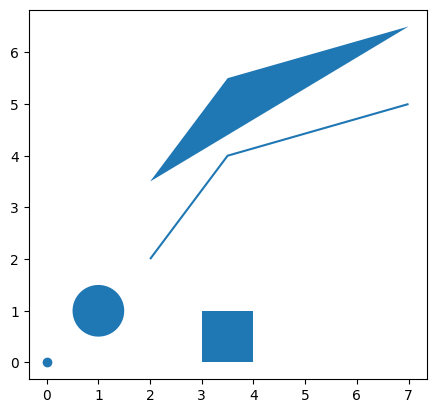

In [89]:
### Visualizing

mygdf.plot()

In [90]:
import matplotlib.pyplot as plt

<Axes: >

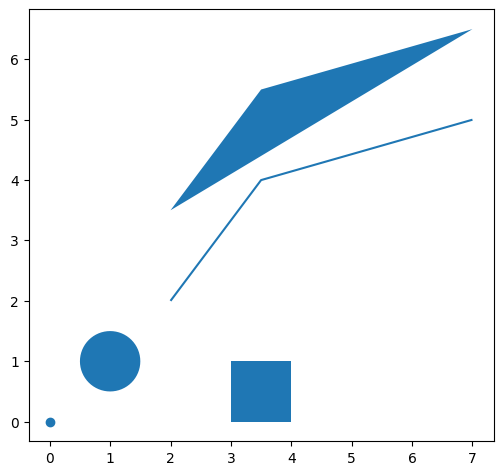

In [91]:
f, ax = plt.subplots(1, 1, figsize = (6, 6))

mygdf.plot(ax=ax)

<Axes: >

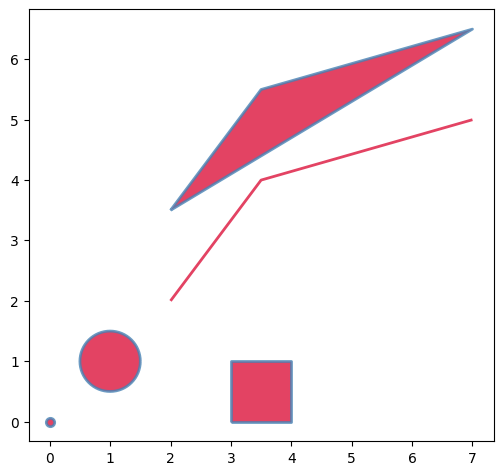

In [92]:
f, ax = plt.subplots(1, 1, figsize = (6, 6))

mygdf.plot(ax=ax,
           color = 'crimson',
           edgecolor = 'steelblue',
           linewidth = 2,
           alpha = 0.8)

<Axes: >

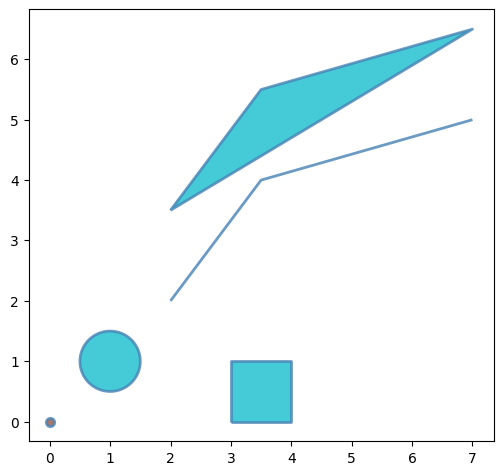

In [93]:
f, ax = plt.subplots(1, 1, figsize = (6, 6))

mygdf.plot(ax=ax,
           column = 'geometry_type',
           edgecolor = 'steelblue',
           linewidth = 2,
           alpha = 0.8)

<Axes: >

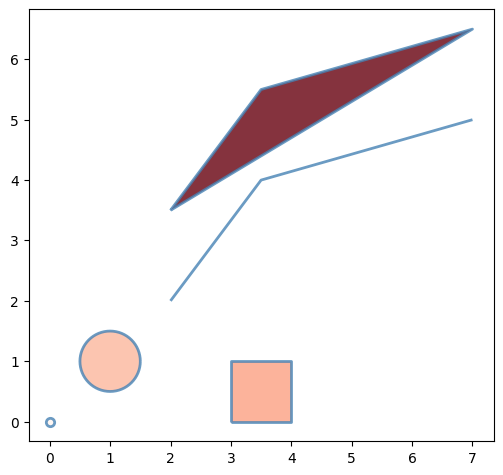

In [94]:
f, ax = plt.subplots(1, 1, figsize = (6, 6))

mygdf.plot(ax=ax,
           column = 'geom_length',
           cmap = 'Reds',
           edgecolor = 'steelblue',
           linewidth = 2,
           alpha = 0.8)

In [95]:
nybb

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


<Axes: >

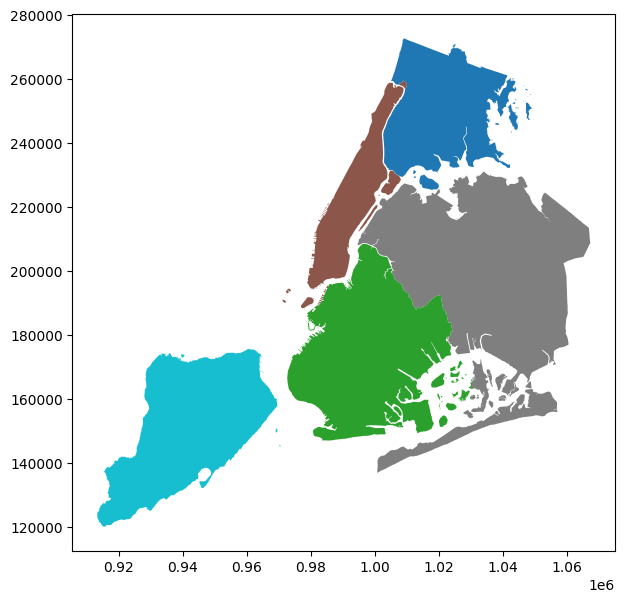

In [96]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))

nybb.plot(ax = ax,
          column = 'BoroName',
          linewidth = 1.5,
          cmap = 'tab10')

(905464.7390380859, 1075092.8783935546, 112485.76063504723, 280480.4142594267)

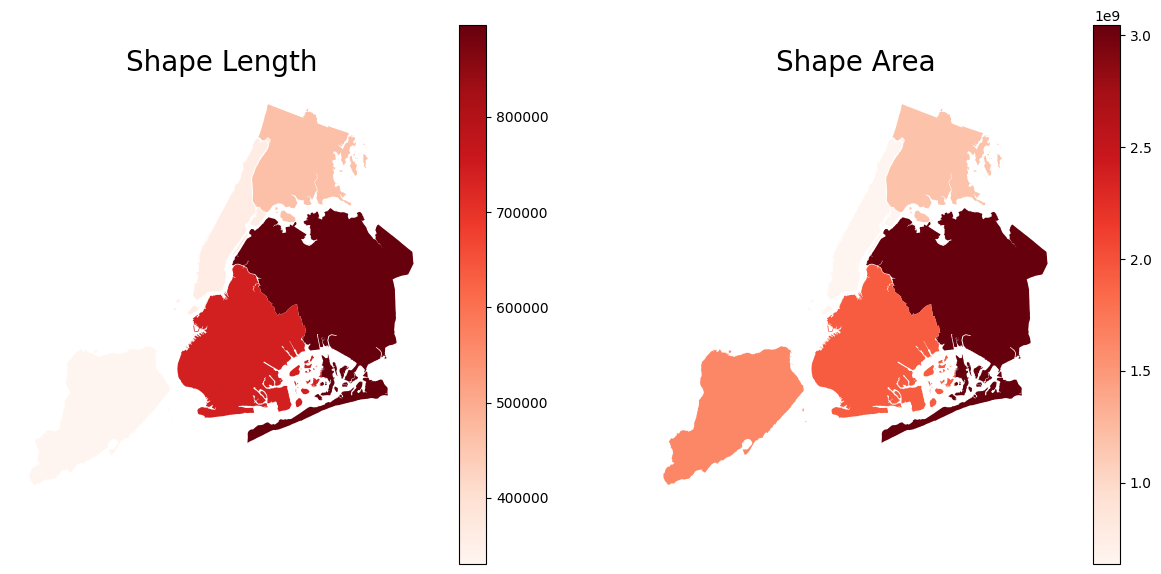

In [97]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))

nybb.plot(column = 'Shape_Leng', 
          ax = ax[0], 
          cmap = 'Reds',
          legend = True)

nybb.plot(column = 'Shape_Area', 
          ax = ax[1], 
          cmap = 'Reds',
          legend = True)

ax[0].set_title('Shape Length', 
                fontsize = 20, 
                pad =10)

ax[1].set_title('Shape Area', 
                fontsize = 20, 
                pad = 10)

ax[0].axis('off')
ax[1].axis('off')

In [98]:
### Map Projections

## Querying CRS

In [99]:
nybb.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [100]:
print(nybb.crs)

EPSG:2263


In [101]:
## Changing the CRS

new_nybb = nybb.to_crs('26901')

In [102]:
print(new_nybb.crs) 

EPSG:26901


In [103]:
new_nybb.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((6568740.023 11629009.227, 6568..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((6555333.786 11652742.401, 6555..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((6558609.696 11649865.005, 6558..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((6548756.45 11627237.074, 65488..."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((6526768.463 11634585.99, 65268..."


(6503139.778305784, 6591919.756065588, 11603936.184821937, 11667345.16081068)

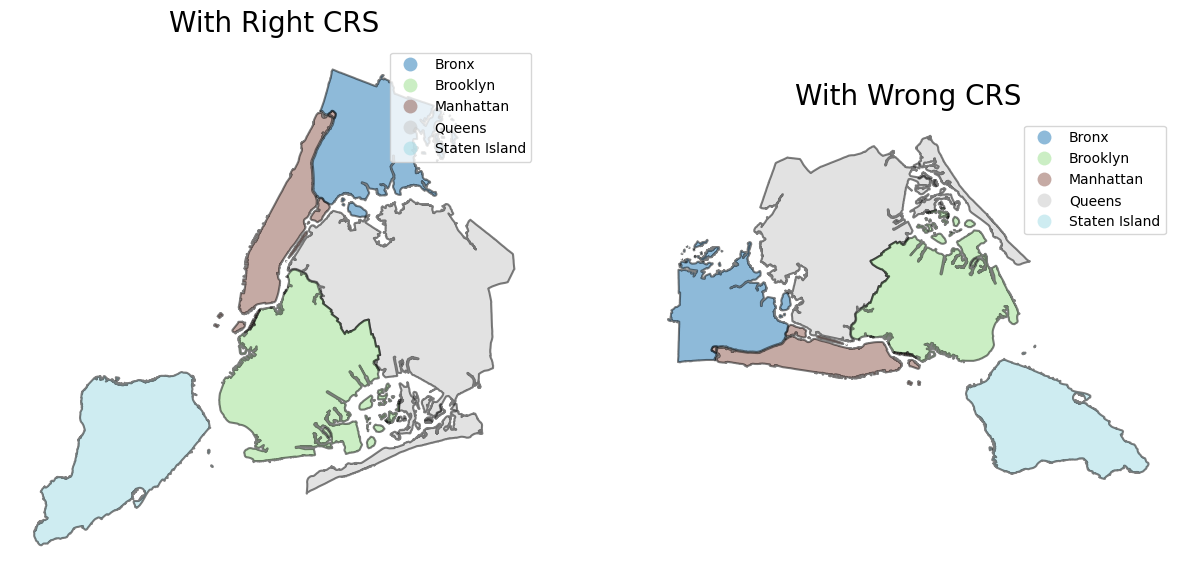

In [104]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))

nybb.plot(column = 'BoroName', 
          ax = ax[0], 
          cmap = 'tab20',
          alpha = 0.5,
          linewidth = 1.5,
          edgecolor = 'black',
          legend = True)

new_nybb.plot(column = 'BoroName', 
          ax = ax[1], 
          cmap = 'tab20',
          alpha = 0.5,
          linewidth = 1.5,
          edgecolor = 'black',
          legend = True)

ax[0].set_title('With Right CRS', 
                fontsize = 20, 
                pad =10)

ax[1].set_title('With Wrong CRS',
                fontsize = 20, 
                pad = 10)

ax[0].axis('off')
ax[1].axis('off')

##### From the above demonstration we can see that selecting the right Coordinate Reference System is very important lest your map end up looking upside down

In [105]:
# Importing Necessary Libraries

import geopandas as silas
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# Create the geometries
top = Polygon([(0, 1), (0, 2), (2, 2), (2, 1)])
bottom = Polygon([(-1, 0), (-1, 1), (4, 1), (4, 0)])
wheel_front = Point(0, -0.5).buffer(0.5)
wheel_rear = Point(3, -0.5).buffer(0.5)

# Combine geometries into a list
geometries = [top, bottom, wheel_front, wheel_rear]
geometries

[<POLYGON ((0 1, 0 2, 2 2, 2 1, 0 1))>,
 <POLYGON ((-1 0, -1 1, 4 1, 4 0, -1 0))>,
 <POLYGON ((0.5 -0.5, 0.498 -0.549, 0.49 -0.598, 0.478 -0.645, 0.462 -0.691, ...>,
 <POLYGON ((3.5 -0.5, 3.498 -0.549, 3.49 -0.598, 3.478 -0.645, 3.462 -0.691, ...>]

In [106]:
# Create a Geodataframe
gdf = silas.GeoDataFrame(geometry= geometries)
gdf.crs = 4326
display(gdf)

,geometry
0,"POLYGON ((0 1, 0 2, 2 2, 2 1, 0 1))"
1,"POLYGON ((-1 0, -1 1, 4 1, 4 0, -1 0))"
2,"POLYGON ((0.5 -0.5, 0.49759 -0.54901, 0.49039 ..."
3,"POLYGON ((3.5 -0.5, 3.49759 -0.54901, 3.49039 ..."


In [107]:
# gdf.to_crs(4326)

* Geographic CRS (EPSG:4326): Uses latitude/longitude and is great for visualization and geospatial analysis, but not for distance or area calculations.

* Projected CRS: Converts coordinates to a flat plane, enabling accurate spatial measurements.

In [108]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [109]:
# Add a new column for geometry length
gdf['geometry_length'] = gdf.length

# Add a new column for geometry area
gdf['geometry_area'] = gdf.area

gdf.head()

C:\Users\user\AppData\Local\Temp\ipykernel_3772\3120514763.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['geometry_length'] = gdf.length
C:\Users\user\AppData\Local\Temp\ipykernel_3772\3120514763.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['geometry_area'] = gdf.area


,geometry,geometry_length,geometry_area
0,"POLYGON ((0 1, 0 2, 2 2, 2 1, 0 1))",6.000000,2.000000
1,"POLYGON ((-1 0, -1 1, 4 1, 4 0, -1 0))",12.000000,5.000000
2,"POLYGON ((0.5 -0.5, 0.49759 -0.54901, 0.49039 ...",3.140331,0.784137
3,"POLYGON ((3.5 -0.5, 3.49759 -0.54901, 3.49039 ...",3.140331,0.784137


In [110]:
gdf['geometry'] = [g.buffer(0.2) for g in gdf.geometry.to_list()]

gdf.head()

,geometry,geometry_length,geometry_area
0,"POLYGON ((0 0.8, -0.0196 0.80096, -0.03902 0.8...",6.000000,2.000000
1,"POLYGON ((-1 -0.2, -1.0196 -0.19904, -1.03902 ...",12.000000,5.000000
2,"POLYGON ((0.69976 -0.49019, 0.69976 -0.50981, ...",3.140331,0.784137
3,"POLYGON ((3.69976 -0.49019, 3.69976 -0.50981, ...",3.140331,0.784137


<Axes: >

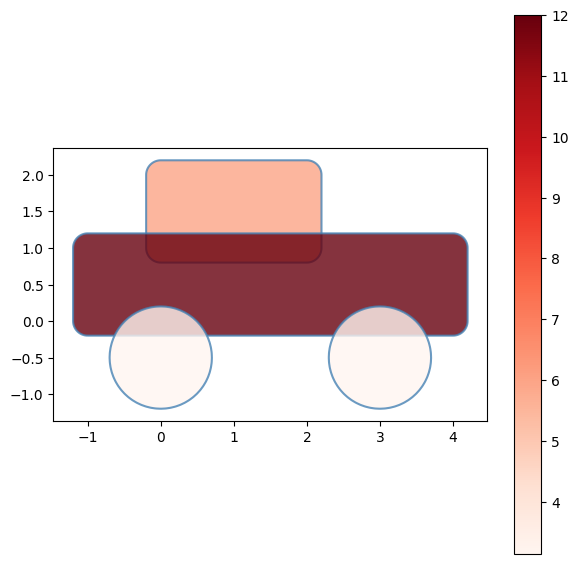

In [111]:
# Visualize the Geodataframe

f, ax = plt.subplots(1, 1, figsize = (7, 7))

gdf.plot(ax=ax,
         column = 'geometry_length',
         cmap = 'Reds',
         edgecolor = 'steelblue',
         linewidth = 1.5,
         legend = True,
         alpha = 0.8)

Text(0.5, 1.0, 'Nyc Projection')

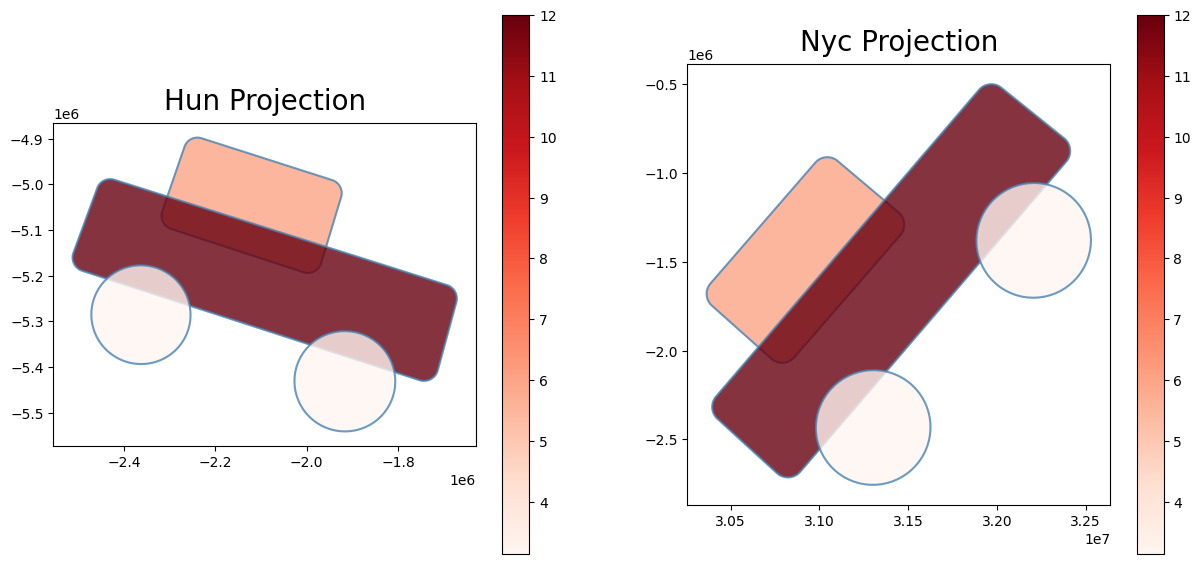

In [112]:
# Create new projections for comparison

gdf_nyc = gdf.to_crs('2263')
gdf_hun = gdf.to_crs('23700')

# Visualize the two see the difference


f, ax = plt.subplots(1, 2, figsize = (15, 7))

gdf_hun.plot(ax=ax[0],
         column = 'geometry_length',
         cmap = 'Reds',
         edgecolor = 'steelblue',
         linewidth = 1.5,
         legend = True,
         alpha = 0.8)
# plt.show()

# Visualize the Geodataframe

# f, ax = plt.subplots(1, 1, figsize = (7, 7))

gdf_nyc.plot(ax=ax[1],
         column = 'geometry_length',
         cmap = 'Reds',
         edgecolor = 'steelblue',
         linewidth = 1.5,
         legend = True,
         alpha = 0.8)
# plt.show()

ax[0].set_title('Hun Projection',
                fontsize = 20,
                pad = 10)

ax[1].set_title('Nyc Projection',
                fontsize = 20, 
                pad = 10)

# ax[0].axis('off')
# ax[1].axis('off')
                

In [113]:
file = r"C:\Users\user\Documents\Detecting Fake News\2020 Neighborhood Tabulation Areas (NTAs)_20250125.geojson"

gdf2 = silas.read_file(file)

In [114]:
print(len(gdf2))

gdf2.head()

262


,shape_area,ntaname,cdtaname,shape_leng,boroname,ntatype,nta2020,borocode,countyfips,ntaabbrev,cdta2020,geometry
0,35321204.8204,Greenpoint,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28912.5653122,Brooklyn,0,BK0101,3,047,Grnpt,BK01,"MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ..."
1,28854314.555,Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28098.0267744,Brooklyn,0,BK0102,3,047,Wllmsbrg,BK01,"MULTIPOLYGON (((-73.95814 40.7244, -73.95772 4..."
2,15208960.44,South Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),18250.2804159,Brooklyn,0,BK0103,3,047,SWllmsbrg,BK01,"MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ..."
3,52266209.4439,East Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),43184.773814,Brooklyn,0,BK0104,3,047,EWllmsbrg,BK01,"MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ..."
4,9982321.73877,Brooklyn Heights,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,14312.506134,Brooklyn,0,BK0201,3,047,BkHts,BK02,"MULTIPOLYGON (((-73.99103 40.69985, -73.99124 ..."


In [115]:
gdf2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

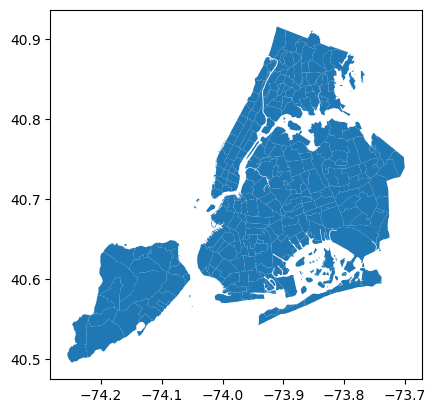

In [116]:
gdf2.plot()

<Axes: >

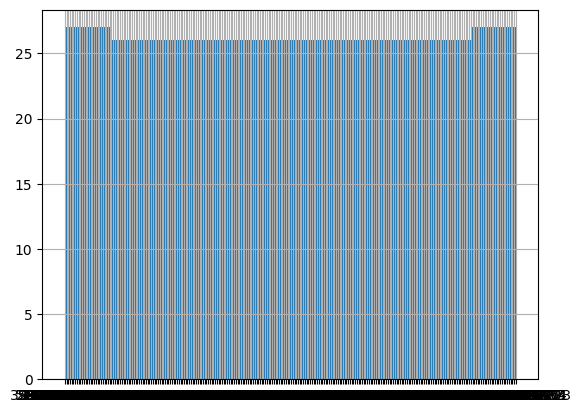

In [117]:
gdf2.shape_area.hist()

In [118]:
gdf2.shape_area.describe()

count               262
unique              262
top       35321204.8204
freq                  1
Name: shape_area, dtype: object

In [119]:
gdf2.shape_area.to_list()[0]

'35321204.8204'

In [120]:
type(gdf2.shape_area.to_list()[0])

str

In [121]:
gdf['shape_area'] = gdf2.shape_area.astype(float)
gdf['shape_leng'] = gdf2.shape_leng.astype(float)

Text(0.5, 1.0, 'NYC Neighborhood Length')

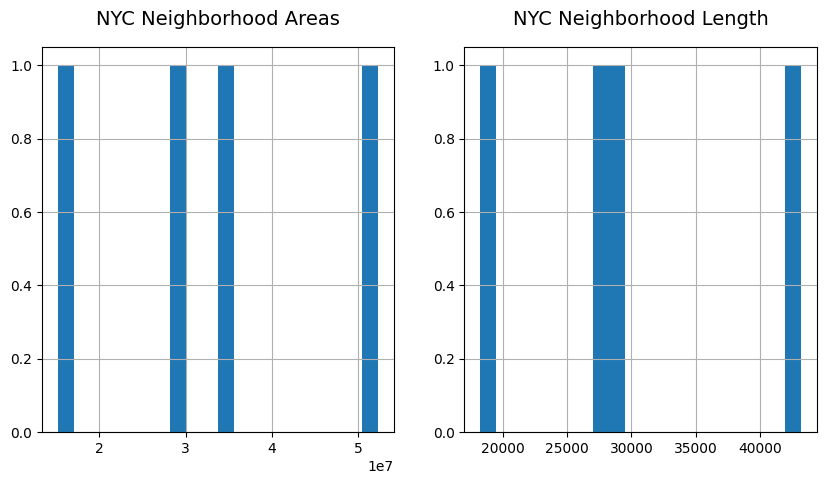

In [122]:
f, ax = plt.subplots(1, 2, figsize = (10, 5))

gdf.shape_area.hist(ax=ax[0], bins=20)
gdf.shape_leng.hist(ax=ax[1], bins=20)

# ax[0].set_yscale('log')
# ax[1].set_yscale('log')

ax[0].set_title('NYC Neighborhood Areas', fontsize = 14, pad = 16)
ax[1].set_title('NYC Neighborhood Length', fontsize = 14, pad = 16)

In [123]:
nybb

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [124]:
gdf2.head(5)

,shape_area,ntaname,cdtaname,shape_leng,boroname,ntatype,nta2020,borocode,countyfips,ntaabbrev,cdta2020,geometry
0,35321204.8204,Greenpoint,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28912.5653122,Brooklyn,0,BK0101,3,047,Grnpt,BK01,"MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ..."
1,28854314.555,Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28098.0267744,Brooklyn,0,BK0102,3,047,Wllmsbrg,BK01,"MULTIPOLYGON (((-73.95814 40.7244, -73.95772 4..."
2,15208960.44,South Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),18250.2804159,Brooklyn,0,BK0103,3,047,SWllmsbrg,BK01,"MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ..."
3,52266209.4439,East Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),43184.773814,Brooklyn,0,BK0104,3,047,EWllmsbrg,BK01,"MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ..."
4,9982321.73877,Brooklyn Heights,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,14312.506134,Brooklyn,0,BK0201,3,047,BkHts,BK02,"MULTIPOLYGON (((-73.99103 40.69985, -73.99124 ..."


Text(0.5, 1.0, 'NYC Neighborhoods')

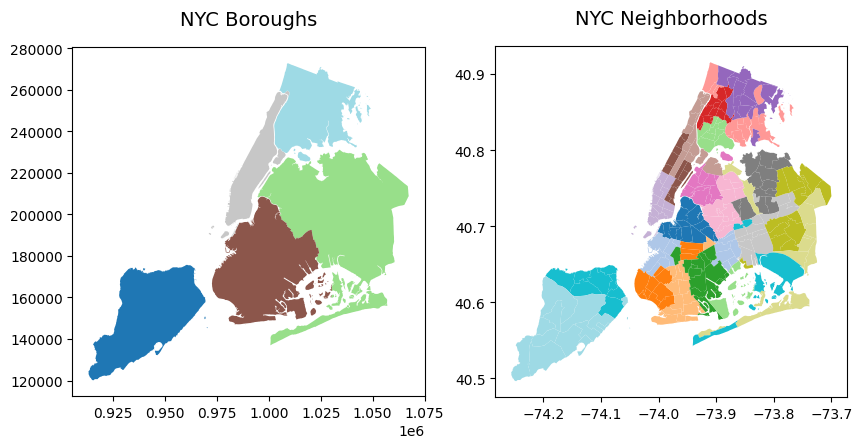

In [125]:
# Comparison between Boroughs and Neighborhoods

f, ax = plt.subplots(1, 2, figsize = (10, 5))

nybb.plot(ax=ax[0], cmap='tab20')
gdf2.plot(ax=ax[1], cmap='tab20')

ax[0].set_title('NYC Boroughs', fontsize = 14, pad = 16)
ax[1].set_title('NYC Neighborhoods', fontsize = 14, pad = 16)

In [126]:
nybb.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [127]:
gdf2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [128]:
gdf_local = gdf2.to_crs(nybb.crs)

In [129]:
print(gdf_local.crs)

EPSG:2263


In [130]:
gdf_local.head()

,shape_area,ntaname,cdtaname,shape_leng,boroname,ntatype,nta2020,borocode,countyfips,ntaabbrev,cdta2020,geometry
0,35321204.8204,Greenpoint,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28912.5653122,Brooklyn,0,BK0101,3,047,Grnpt,BK01,"MULTIPOLYGON (((1003059.997 204572.026, 100299..."
1,28854314.555,Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28098.0267744,Brooklyn,0,BK0102,3,047,Wllmsbrg,BK01,"MULTIPOLYGON (((995851.916 203199.332, 995969...."
2,15208960.44,South Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),18250.2804159,Brooklyn,0,BK0103,3,047,SWllmsbrg,BK01,"MULTIPOLYGON (((998047.21 196303.325, 998157.9..."
3,52266209.4439,East Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),43184.773814,Brooklyn,0,BK0104,3,047,EWllmsbrg,BK01,"MULTIPOLYGON (((1005302.497 199455.73, 1005307..."
4,9982321.73877,Brooklyn Heights,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,14312.506134,Brooklyn,0,BK0201,3,047,BkHts,BK02,"MULTIPOLYGON (((986737.331 194249.786, 986678...."


In [131]:
df_group_1 = gdf_local.groupby(by = 'boroname').count()[['geometry']]

df_group_1

,geometry
boroname,
Bronx,50
Brooklyn,69
Manhattan,38
Queens,82
Staten Island,23


In [132]:
gdf_over = silas.overlay(nybb, gdf_local[['ntaname', 'geometry']])

gdf_over.head(3)

,BoroCode,BoroName,Shape_Leng,Shape_Area,ntaname,geometry
0,5,Staten Island,330470.010332,1.623820e+09,St. George-New Brighton,"POLYGON ((961906.508 175459.97, 961906.508 175..."
1,5,Staten Island,330470.010332,1.623820e+09,Tompkinsville-Stapleton-Clifton-Fox Hills,"POLYGON ((964105.855 171704.149, 964108.217 17..."
2,5,Staten Island,330470.010332,1.623820e+09,Rosebank-Shore Acres-Park Hill,"POLYGON ((964080.065 167597.234, 964106.075 16..."


##### Borough vs Neighborhood, may create some inconsistencies because some areas may not perfectly overlap due to different data collection techniques or boundary definitions variations

In [133]:
## Match boroughs and neighborhoods

df_group_2 = gdf_over.groupby(by = 'BoroName').count()

df_group_2 = df_group_2[['ntaname']].rename(columns = {'ntaname' : 'ngh_cnt_2'})

df_group_2

,ngh_cnt_2
BoroName,
Bronx,52
Brooklyn,80
Manhattan,46
Queens,94
Staten Island,23


In [134]:
df_group = df_group_1.merge(df_group_2, left_index = True, right_index = True)

df_group

,geometry,ngh_cnt_2
boroname,,
Bronx,50,52
Brooklyn,69,80
Manhattan,38,46
Queens,82,94
Staten Island,23,23


In [135]:
df_group.corr()

,geometry,ngh_cnt_2
geometry,1.000000,0.994182
ngh_cnt_2,0.994182,1.000000


<Axes: >

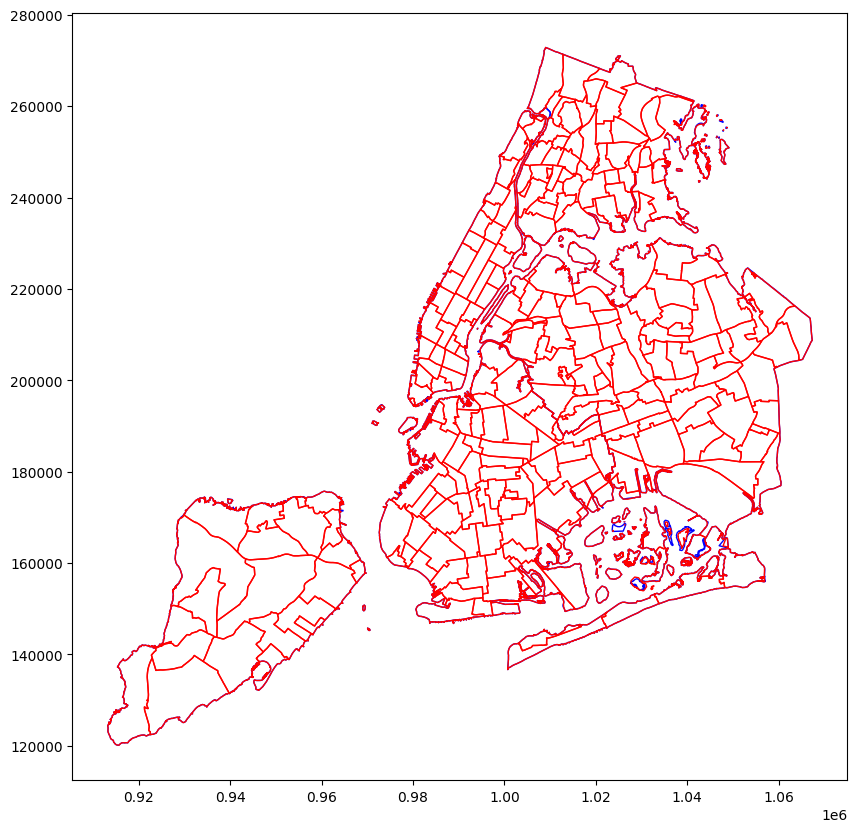

In [136]:
f, ax = plt.subplots(1, 1, figsize = (10, 10))

nybb.plot(ax = ax,
          color = 'none',
          edgecolor = 'b')

gdf_local.plot(ax = ax,
               color = 'none',
               edgecolor = 'r')

##### we need to be keen when preparing the data, because as we can see there is slight mismatch

In [137]:
### Enriching Admin Boundaries with Population Information

import pandas as pd

df = pd.read_csv(r'C:\Users\user\Documents\Detecting Fake News\New_York_City_Population_ByNTA_2020.csv')

df

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,Bronx,2000,5,BX01,Claremont-Bathgate,28149
1,Bronx,2000,5,BX03,Eastchester-Edenwald-Baychester,35422
2,Bronx,2000,5,BX05,Bedford Park-Fordham North,55329
3,Bronx,2000,5,BX06,Belmont,25967
4,Bronx,2000,5,BX07,Bronxdale,34309
...,...,...,...,...,...,...
385,Staten Island,2010,85,SI37,Stapleton-Rosebank,26453
386,Staten Island,2010,85,SI45,New Dorp-Midland Beach,21896
387,Staten Island,2010,85,SI48,Arden Heights,25238
388,Staten Island,2010,85,SI54,Great Kills,40720


In [138]:
print(set(df.Year))

{2000, 2010}


In [139]:
# Load the shapefile
shp_file = r"C:\Users\user\Documents\Detecting Fake News\New york NTA Shp\nynta2010.shp"  
gdf_shp = silas.read_file(shp_file)

# Save as GeoJSON
geojson_file = "NYNTA2010.geojson"  
gdf_shp.to_file(geojson_file, driver="GeoJSON")

print(f"Shapefile successfully converted to GeoJSON and saved as {geojson_file}")


Shapefile successfully converted to GeoJSON and saved as NYNTA2010.geojson


In [140]:
new_gdf = silas.read_file(r'C:\Users\user\Documents\Detecting Fake News\NYNTA2010.geojson')

print(len(new_gdf))

195


In [141]:
df = df[df.Year == 2010]

len(df)

195

In [142]:
set(df.Year)

{2010}

In [143]:
set(new_gdf.columns)

{'BoroCode',
 'BoroName',
 'CountyFIPS',
 'NTACode',
 'NTAName',
 'Shape_Area',
 'Shape_Leng',
 'geometry'}

In [144]:
display(new_gdf.head(3))
display(df.head(3))

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry
0,4,Queens,081,QN08,St. Albans,45401.316887,7.741275e+07,"POLYGON ((1052996.114 196307.361, 1053081.596 ..."
1,3,Brooklyn,047,BK50,Canarsie,43703.609937,8.208968e+07,"MULTIPOLYGON (((1015236.113 174910.103, 101523..."
2,2,Bronx,005,BX41,Mount Hope,18937.248074,1.471671e+07,"POLYGON ((1013128.551 250637.755, 1012848.354 ..."


,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
195,Bronx,2010,5,BX01,Claremont-Bathgate,31078
196,Bronx,2010,5,BX03,Eastchester-Edenwald-Baychester,34517
197,Bronx,2010,5,BX05,Bedford Park-Fordham North,54415


In [145]:
codes_1 = set(df['NTA Code'])
codes_2 = set(new_gdf['NTACode'])

In [146]:
len(codes_1), len(codes_2), len(codes_1.intersection(codes_2))

(195, 195, 195)

In [147]:
gdf_merged = new_gdf.merge(df, left_on = 'NTACode', right_on = 'NTA Code')

gdf_merged.head(3)

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,4,Queens,081,QN08,St. Albans,45401.316887,7.741275e+07,"POLYGON ((1052996.114 196307.361, 1053081.596 ...",Queens,2010,81,QN08,St. Albans,48593
1,3,Brooklyn,047,BK50,Canarsie,43703.609937,8.208968e+07,"MULTIPOLYGON (((1015236.113 174910.103, 101523...",Brooklyn,2010,47,BK50,Canarsie,83693
2,2,Bronx,005,BX41,Mount Hope,18937.248074,1.471671e+07,"POLYGON ((1013128.551 250637.755, 1012848.354 ...",Bronx,2010,5,BX41,Mount Hope,51807


In [148]:
n_gdf_merged = gdf_merged[['NTACode', 'NTAName', 'geometry', 'Population']]

n_gdf_merged.head(3)

,NTACode,NTAName,geometry,Population
0,QN08,St. Albans,"POLYGON ((1052996.114 196307.361, 1053081.596 ...",48593
1,BK50,Canarsie,"MULTIPOLYGON (((1015236.113 174910.103, 101523...",83693
2,BX41,Mount Hope,"POLYGON ((1013128.551 250637.755, 1012848.354 ...",51807


Text(0.5, 1.0, 'NYC Population by Neighborhoods')

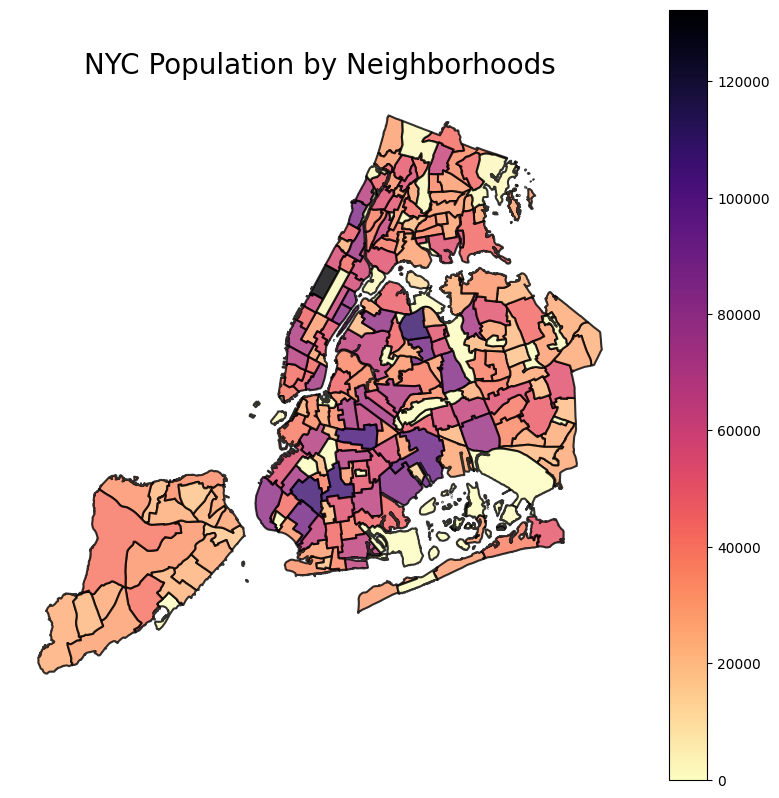

In [149]:
# Visualize the Population

f, ax = plt.subplots(1, 1, figsize = (10, 10))

n_gdf_merged.plot(ax = ax,
                    column = 'Population',
                    cmap = 'magma_r', # autumn_r, magma_r, viridis_r, inferno_r, cividis_r, plasma_r could be tried out too
                    edgecolor = 'black',
                    linewidth = 1.5,
                    legend = True,
                    alpha = 0.8)

ax.axis('off')

ax.set_title('NYC Population by Neighborhoods', fontsize = 20, pad = 10)

In [150]:
### Exploring the admin boundaries of New York City

gdf_manhattan = gdf_merged[gdf_merged.BoroName == 'Manhattan']

gdf_manhattan.head(3)

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
34,1,Manhattan,061,MN19,Turtle Bay-East Midtown,21251.841449,1.739017e+07,"MULTIPOLYGON (((995190.545 210376.739, 995176....",Manhattan,2010,61,MN19,Turtle Bay-East Midtown,51231
35,1,Manhattan,061,MN04,Hamilton Heights,17103.363287,1.598438e+07,"POLYGON ((1000758.421 241841.071, 1000815.207 ...",Manhattan,2010,61,MN04,Hamilton Heights,48520
36,1,Manhattan,061,MN50,Stuyvesant Town-Cooper Village,11061.818729,5.575563e+06,"MULTIPOLYGON (((994681.406 203127.675, 994780....",Manhattan,2010,61,MN50,Stuyvesant Town-Cooper Village,21049


In [151]:
gdf_manhattan_local = gdf_manhattan.to_crs('2263')
gdf_merged = gdf_merged.to_crs('2263')

<Axes: >

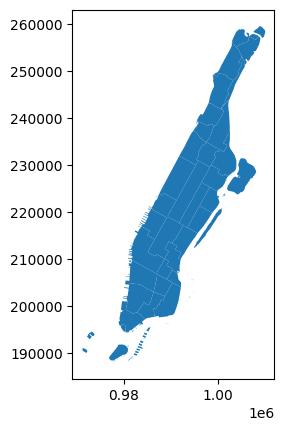

In [152]:
gdf_manhattan_local.plot()

In [153]:
dist = [100, 1000, 5000, 10000, 25000, 100000]

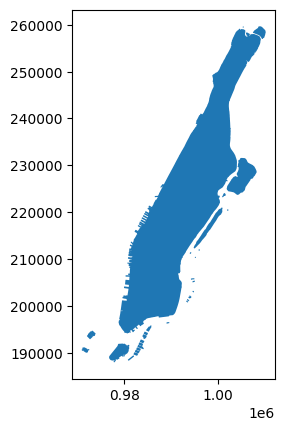

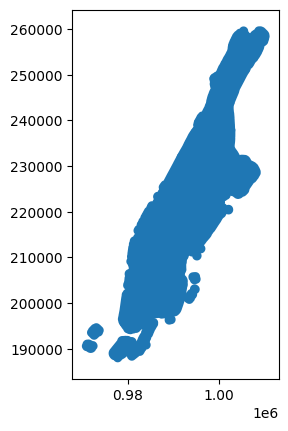

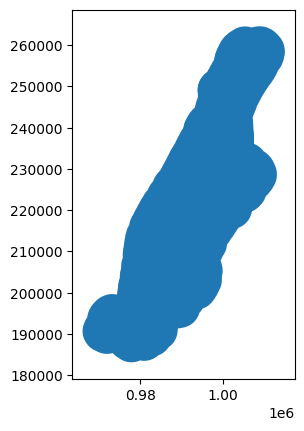

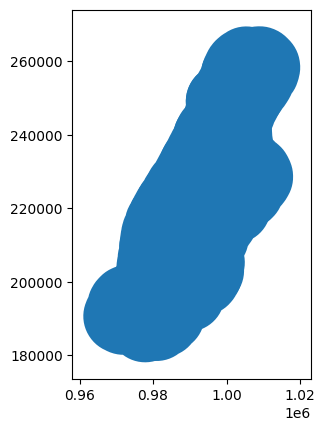

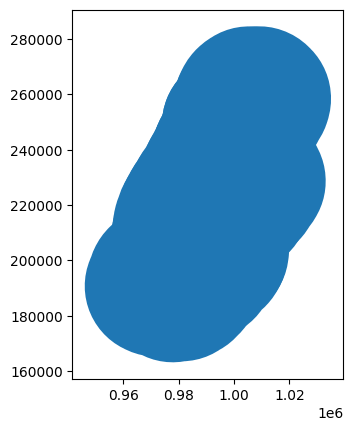

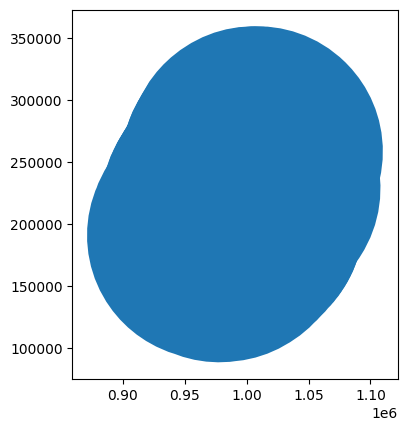

In [154]:
for distance in dist:
    gdf_manhattan_local[f'buffer_{distance}'] = gdf_manhattan_local.buffer(distance).plot()

<Axes: >

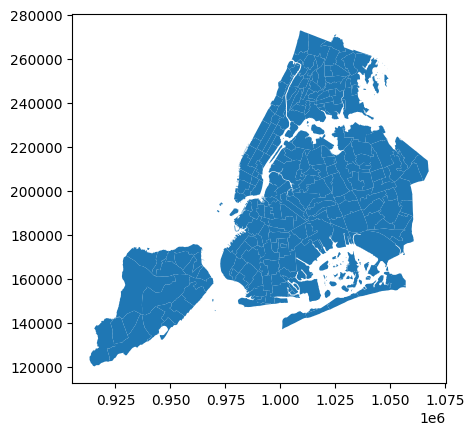

In [155]:
gdf_merged.plot()

In [156]:
gdf_merged_local_points = gdf_merged.copy()
gdf_merged_local_points['geometry'] = [g.centroid for g in list(gdf_merged_local_points.geometry)]
gdf_merged_local_points.head(3)

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,4,Queens,081,QN08,St. Albans,45401.316887,7.741275e+07,POINT (1049933.65 191188.479),Queens,2010,81,QN08,St. Albans,48593
1,3,Brooklyn,047,BK50,Canarsie,43703.609937,8.208968e+07,POINT (1012073.055 171748.235),Brooklyn,2010,47,BK50,Canarsie,83693
2,2,Bronx,005,BX41,Mount Hope,18937.248074,1.471671e+07,POINT (1010498.971 248626.411),Bronx,2010,5,BX41,Mount Hope,51807


<Axes: >

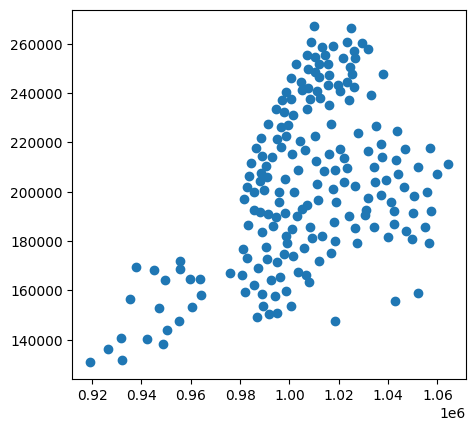

In [157]:
gdf_merged_local_points.plot()

<Axes: >

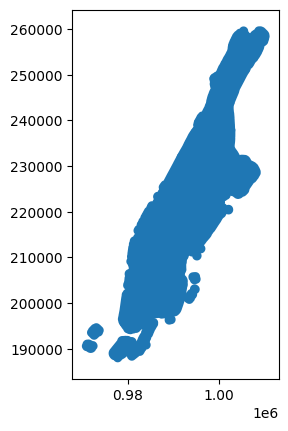

In [158]:
### Buffering

distance1 = 1000

gdf_manhattan_local_buffer = gdf_manhattan_local.copy()
gdf_manhattan_local_buffer['geometry'] = gdf_manhattan_local_buffer['geometry'].buffer(distance1)

gdf_manhattan_local_buffer.plot()

In [159]:
#v Spatial Join

gdf_join = silas.sjoin(gdf_merged_local_points, gdf_manhattan_local_buffer)

gdf_join.head(3)

,BoroCode_left,BoroName_left,CountyFIPS_left,NTACode_left,NTAName_left,Shape_Leng_left,Shape_Area_left,geometry,Borough_left,Year_left,...,FIPS County Code_right,NTA Code_right,NTA Name_right,Population_right,buffer_100,buffer_1000,buffer_5000,buffer_10000,buffer_25000,buffer_100000
34,1,Manhattan,061,MN19,Turtle Bay-East Midtown,21251.841449,1.739017e+07,POINT (992833.538 214094.769),Manhattan,2010,...,61,MN19,Turtle Bay-East Midtown,51231,"Axes(0.354348,0.11;0.316304x0.77)","Axes(0.351153,0.11;0.322694x0.77)","Axes(0.33866,0.11;0.347681x0.77)","Axes(0.326116,0.11;0.372768x0.77)","Axes(0.300904,0.11;0.423191x0.77)","Axes(0.25842,0.11;0.508161x0.77)"
35,1,Manhattan,061,MN04,Hamilton Heights,17103.363287,1.598438e+07,POINT (998512.43 240587.186),Manhattan,2010,...,61,MN04,Hamilton Heights,48520,"Axes(0.354348,0.11;0.316304x0.77)","Axes(0.351153,0.11;0.322694x0.77)","Axes(0.33866,0.11;0.347681x0.77)","Axes(0.326116,0.11;0.372768x0.77)","Axes(0.300904,0.11;0.423191x0.77)","Axes(0.25842,0.11;0.508161x0.77)"
36,1,Manhattan,061,MN50,Stuyvesant Town-Cooper Village,11061.818729,5.575563e+06,POINT (990740.286 205897.032),Manhattan,2010,...,61,MN28,Lower East Side,72957,"Axes(0.354348,0.11;0.316304x0.77)","Axes(0.351153,0.11;0.322694x0.77)","Axes(0.33866,0.11;0.347681x0.77)","Axes(0.326116,0.11;0.372768x0.77)","Axes(0.300904,0.11;0.423191x0.77)","Axes(0.25842,0.11;0.508161x0.77)"


<Axes: >

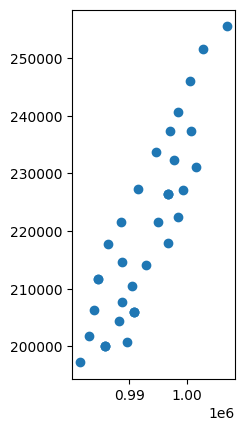

In [160]:
gdf_join.plot()

In [161]:
### Compute Population

print(f'Manhattan Population is: ', sum(gdf_join.Population_left))
print(f'Buffer Zone Population is: ', sum(gdf_join.Population_right))
print(f'Population Ratio: ', round((sum(gdf_join.Population_left) / sum(gdf_join.Population_right)), 2))

Manhattan Population is:  1797507
Buffer Zone Population is:  1966404
Population Ratio:  0.91


In [162]:
# Packaging everything neatly to a function we can call at any given time to calculate buffer calculations

def buffer_population(distance):

    # Buffer the geometries
    gdf_manhattan_local_buffer = gdf_manhattan_local.copy()
    gdf_manhattan_local_buffer['geometry'] = gdf_manhattan_local_buffer['geometry'].buffer(distance)

    gdf_manhattan_local_buffer.plot()

    # Spatial Join

    gdf_join = silas.sjoin(gdf_merged_local_points, gdf_manhattan_local_buffer)

    # Compute Population
    print('Zone Size is:', distance, 'feet')
    print('Manhattan Population is: ', sum(gdf_join.Population_left))
    print('Buffer Zone Population is: ', sum(gdf_join.Population_right))
    print('Population Ratio: ', round((sum(gdf_join.Population_left) / sum(gdf_join.Population_right)), 2))
    print()

In [163]:
dist

[100, 1000, 5000, 10000, 25000, 100000]

Zone Size is: 100 feet
Manhattan Population is:  1585873
Buffer Zone Population is:  1641926
Population Ratio:  0.97

Zone Size is: 1000 feet
Manhattan Population is:  1797507
Buffer Zone Population is:  1966404
Population Ratio:  0.91

Zone Size is: 5000 feet
Manhattan Population is:  11454568
Buffer Zone Population is:  11432763
Population Ratio:  1.0

Zone Size is: 10000 feet
Manhattan Population is:  24556715
Buffer Zone Population is:  25297507
Population Ratio:  0.97

Zone Size is: 25000 feet
Manhattan Population is:  71911298
Buffer Zone Population is:  79238550
Population Ratio:  0.91

Zone Size is: 100000 feet
Manhattan Population is:  234058179
Buffer Zone Population is:  302083724
Population Ratio:  0.77



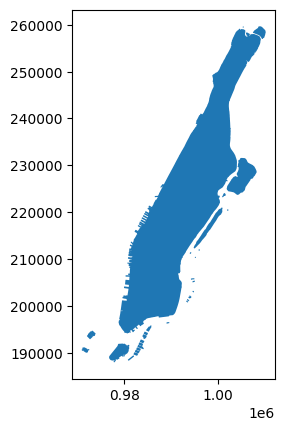

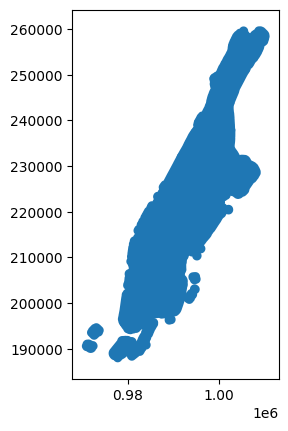

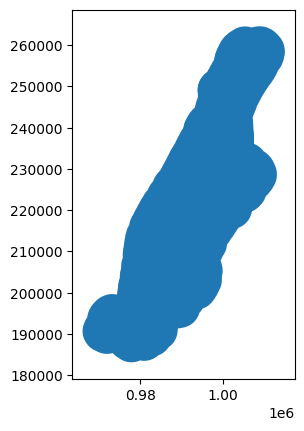

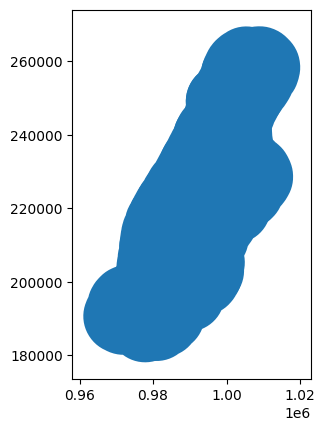

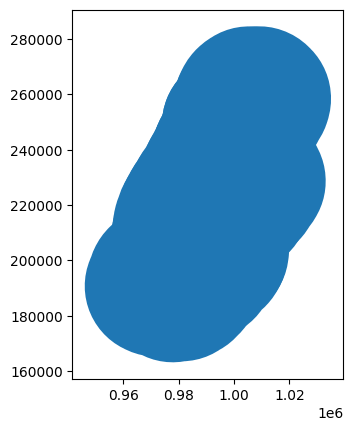

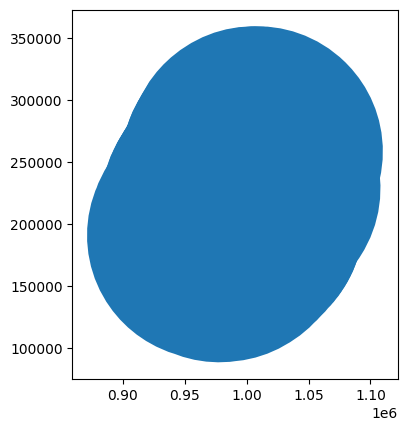

In [164]:
for distance in dist:
    buffer_population(distance)

In [ ]:
### Turning Tabular Data into Geospatial Data

## You can get the tree data from the link below

# https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh/about_data

# Read in Tree Data

tdf = pd.read_csv(r'C:\Users\user\Documents\Detecting Fake News\2015_Street_Tree_Census_-_Tree_Data_20250125.csv', nrows=1000)

tdf.head(3)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09


In [166]:
tdf.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [167]:

len(tdf)

1000

In [168]:
from collections import Counter

Counter(tdf.status).most_common()

[('Alive', 971), ('Dead', 18), ('Stump', 11)]

In [169]:
Counter(tdf.health).most_common()

[('Good', 735), ('Fair', 182), ('Poor', 54), (nan, 29)]

In [170]:
geometry = [Point(xy) for xy in zip(tdf.longitude, tdf.latitude)]

# or
# geometry = [Point(xy) for xy in zip(tdf.x_sp, tdf.y_sp)]
# or
# geometry = [Point(xy) for xy in zip(tdf['longitude'], tdf['latitude'])]

geometry[:3]

[<POINT (-73.844 40.723)>, <POINT (-73.819 40.794)>, <POINT (-73.937 40.718)>]

In [171]:
tree_gdf = silas.GeoDataFrame(tdf, 
                              crs = 'EPSG:4326', 
                              geometry = geometry)[['tree_id', 'stump_diam', 'status', 'health', 'spc_latin', 'geometry', 'problems', 'borough']]

tree_gdf.tail(3)

,tree_id,stump_diam,status,health,spc_latin,geometry,problems,borough
997,177355,0,Alive,Poor,Acer platanoides,POINT (-74.00015 40.68505),RootOther,Brooklyn
998,195035,0,Alive,Good,Acer platanoides,POINT (-73.95752 40.62479),NaN,Brooklyn
999,177062,0,Alive,Good,Acer platanoides,POINT (-74.0966 40.59259),Stones,Staten Island


Text(0.5, 1.0, 'NYC Street Trees by Health Status')

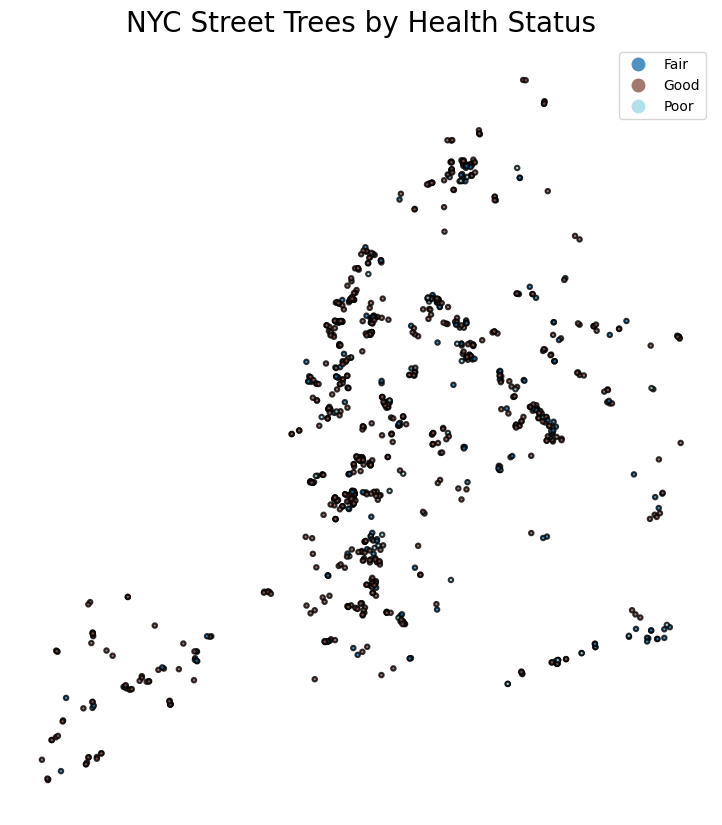

In [172]:
# Visualize the trees based on their health status

f, ax = plt.subplots(1, 1, figsize = (10, 10))

tree_gdf.plot(ax = ax,
              column = 'health',
              cmap = 'tab20',
              edgecolor = 'black',
              linewidth = 1.5,
              markersize = 10,
              legend = True,
              alpha = 0.8)

ax.axis('off')
ax.set_title('NYC Street Trees by Health Status', fontsize = 20, pad = 10)

Text(0.5, 1.0, 'NYC Street Trees by Status')

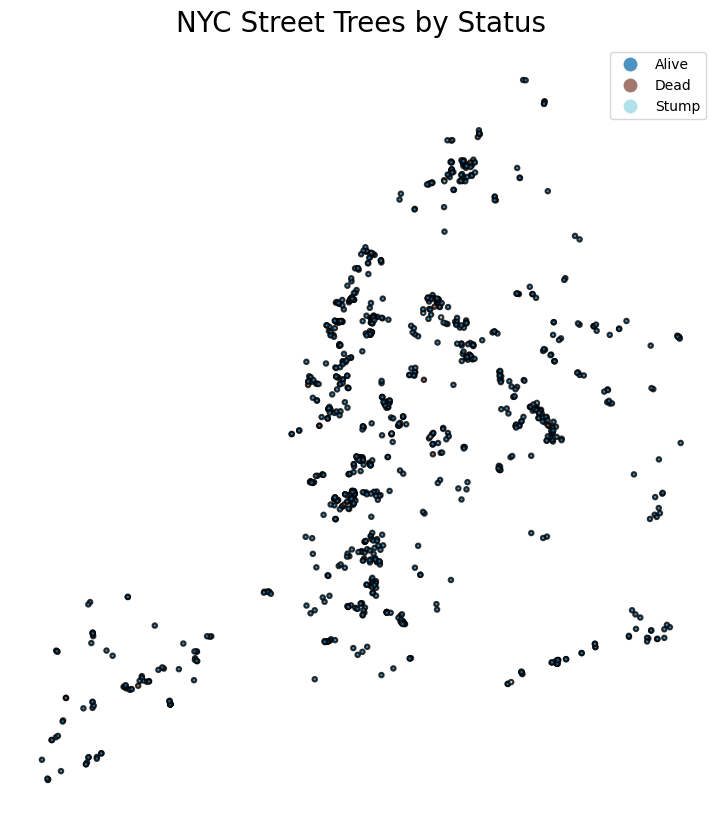

In [173]:
# Visualize the trees based on their health status

f, ax = plt.subplots(1, 1, figsize = (10, 10))

tree_gdf.plot(ax = ax,
              column = 'status',
              cmap = 'tab20',
              edgecolor = 'black',
              linewidth = 1.5,
              markersize = 10,
              legend = True,
              alpha = 0.8)

ax.axis('off')
ax.set_title('NYC Street Trees by Status', fontsize = 20, pad = 10)

#### Urban Greenery Assessment

In [179]:
gdf_merged.head(3)

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,4,Queens,081,QN08,St. Albans,45401.316887,7.741275e+07,"POLYGON ((1052996.114 196307.361, 1053081.596 ...",Queens,2010,81,QN08,St. Albans,48593
1,3,Brooklyn,047,BK50,Canarsie,43703.609937,8.208968e+07,"MULTIPOLYGON (((1015236.113 174910.103, 101523...",Brooklyn,2010,47,BK50,Canarsie,83693
2,2,Bronx,005,BX41,Mount Hope,18937.248074,1.471671e+07,"POLYGON ((1013128.551 250637.755, 1012848.354 ...",Bronx,2010,5,BX41,Mount Hope,51807


In [180]:
tree_gdf.head(3)

,tree_id,stump_diam,status,health,spc_latin,geometry,problems,borough
0,180683,0,Alive,Fair,Acer rubrum,POINT (-73.84422 40.72309),NaN,Queens
1,200540,0,Alive,Fair,Quercus palustris,POINT (-73.81868 40.79411),Stones,Queens
2,204026,0,Alive,Good,Gleditsia triacanthos var. inermis,POINT (-73.93661 40.71758),NaN,Brooklyn


In [182]:
print(gdf_merged.crs)

EPSG:2263


In [183]:
print(tree_gdf.crs)

EPSG:4326


In [184]:
tree_local_gdf = tree_gdf.to_crs(gdf_merged.crs)

In [185]:
print(tree_local_gdf.crs)

EPSG:2263


In [186]:
gdf_tree_join = silas.sjoin(gdf_merged, tree_local_gdf)

gdf_tree_join.head(3)

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,Borough,Year,...,NTA Name,Population,index_right,tree_id,stump_diam,status,health,spc_latin,problems,borough
0,4,Queens,081,QN08,St. Albans,45401.316887,7.741275e+07,"POLYGON ((1052996.114 196307.361, 1053081.596 ...",Queens,2010,...,St. Albans,48593,726,147009,0,Alive,Fair,Acer platanoides,NaN,Queens
0,4,Queens,081,QN08,St. Albans,45401.316887,7.741275e+07,"POLYGON ((1052996.114 196307.361, 1053081.596 ...",Queens,2010,...,St. Albans,48593,289,192294,0,Alive,Good,Platanus x acerifolia,NaN,Queens
1,3,Brooklyn,047,BK50,Canarsie,43703.609937,8.208968e+07,"MULTIPOLYGON (((1015236.113 174910.103, 101523...",Brooklyn,2010,...,Canarsie,83693,865,144863,0,Alive,Poor,Acer platanoides,"Stones,TrunkOther",Brooklyn


In [187]:
red_gdf_tr_join = gdf_tree_join[['NTAName', 'Population', 'geometry', 'tree_id']]

red_gdf_tr_join.head(3)

,NTAName,Population,geometry,tree_id
0,St. Albans,48593,"POLYGON ((1052996.114 196307.361, 1053081.596 ...",147009
0,St. Albans,48593,"POLYGON ((1052996.114 196307.361, 1053081.596 ...",192294
1,Canarsie,83693,"MULTIPOLYGON (((1015236.113 174910.103, 101523...",144863


In [188]:
gdf_grouped = red_gdf_tr_join.groupby(by = 'NTAName').nunique()[['tree_id']]

gdf_grouped = gdf_grouped.rename(columns = {'tree_id' : 'tree_count'})

gdf_grouped.head(3)

,tree_count
NTAName,
Annadale-Huguenot-Prince's Bay-Eltingville,12
Arden Heights,8
Astoria,5


In [189]:
gdf_join_tree = gdf_merged.merge(gdf_grouped, left_on = 'NTAName', right_index = True)

gdf_join_tree.head(3)

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population,tree_count
0,4,Queens,081,QN08,St. Albans,45401.316887,7.741275e+07,"POLYGON ((1052996.114 196307.361, 1053081.596 ...",Queens,2010,81,QN08,St. Albans,48593,2
1,3,Brooklyn,047,BK50,Canarsie,43703.609937,8.208968e+07,"MULTIPOLYGON (((1015236.113 174910.103, 101523...",Brooklyn,2010,47,BK50,Canarsie,83693,1
2,2,Bronx,005,BX41,Mount Hope,18937.248074,1.471671e+07,"POLYGON ((1013128.551 250637.755, 1012848.354 ...",Bronx,2010,5,BX41,Mount Hope,51807,12


In [193]:
gdf_join_tree['trees_per_capita'] = gdf_join_tree.tree_count / gdf_join_tree.Population

gdf_join_tree = gdf_join_tree.sort_values(by = 'tree_count', ascending = False)

gdf_join_tree[['BoroName', 'NTAName', 'Population', 'tree_count', 'trees_per_capita']].head(10)

,BoroName,NTAName,Population,tree_count,trees_per_capita
77,Brooklyn,Park Slope-Gowanus,67649,49,0.000724
62,Queens,Steinway,47534,49,0.001031
175,Queens,Forest Hills,83728,43,0.000514
61,Manhattan,Lincoln Square,61489,32,0.000520
66,Brooklyn,Flatbush,105804,29,0.000274
141,Manhattan,Upper West Side,132378,27,0.000204
100,Manhattan,Lenox Hill-Roosevelt Island,80771,26,0.000322
46,Brooklyn,Clinton Hill,34791,25,0.000719
69,Staten Island,Oakwood-Oakwood Beach,22049,25,0.001134
102,Queens,Jackson Heights,108152,25,0.000231


Text(0.5, 1.0, 'NYC Trees Per Capita')

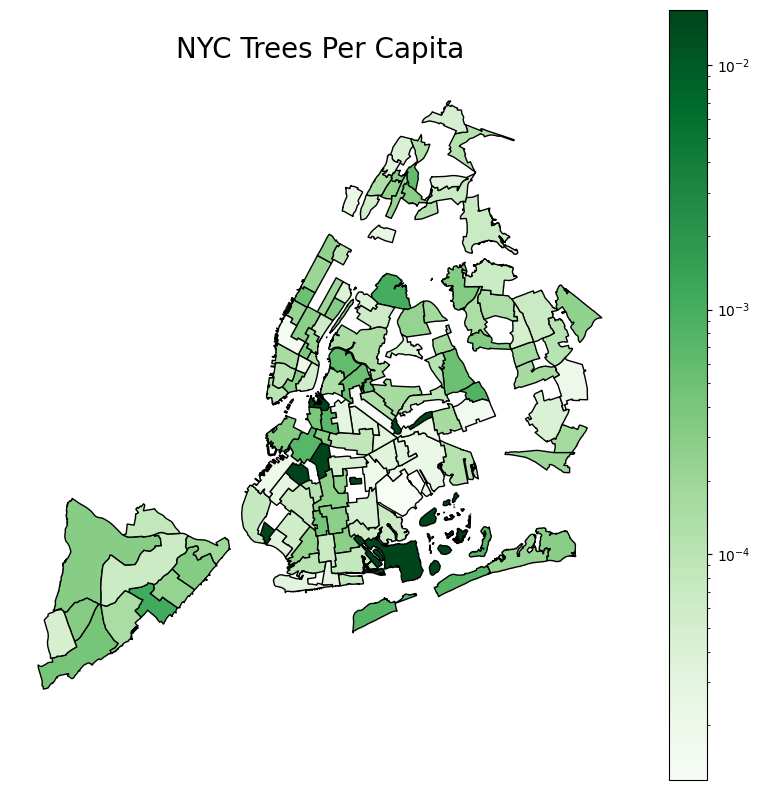

In [196]:
from matplotlib.colors import LogNorm

norm = LogNorm(vmin = gdf_join_tree['trees_per_capita'].min(), 
               vmax = gdf_join_tree['trees_per_capita'].max())

f, ax = plt.subplots(1, 1, figsize = (10, 10))

gdf_join_tree.plot(ax = ax,
                   column = 'trees_per_capita',
                   cmap = 'Greens',
                   edgecolor = 'k',
                   norm = norm,
                   legend = True)

ax.axis('off')

ax.set_title('NYC Trees Per Capita', fontsize = 20, pad = 10)

In [199]:
gdf_merged_local_points.head(3)

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,4,Queens,081,QN08,St. Albans,45401.316887,7.741275e+07,POINT (1049933.65 191188.479),Queens,2010,81,QN08,St. Albans,48593
1,3,Brooklyn,047,BK50,Canarsie,43703.609937,8.208968e+07,POINT (1012073.055 171748.235),Brooklyn,2010,47,BK50,Canarsie,83693
2,2,Bronx,005,BX41,Mount Hope,18937.248074,1.471671e+07,POINT (1010498.971 248626.411),Bronx,2010,5,BX41,Mount Hope,51807


In [200]:
### Count Trees in Queens Neighborhood


# Select a specific neighborhood in Manhattan

gdf_ngh = gdf_merged_local_points[gdf_merged_local_points.BoroName == 'Queens'].head(1)

In [201]:
print(tree_local_gdf.crs)

EPSG:2263


In [202]:
gdf_ngh_local = gdf_ngh.to_crs(2263)

print(gdf_ngh_local.crs)

EPSG:2263


In [203]:
# Define a list of distance values for buffering distances [10, 1000, 10000, 25000, 50000, 75000]

new_dist = [10, 1000, 10000, 25000, 50000, 75000]

# Iterate over each distance, create buffers, and count trees within the buffer zone 

for distance in new_dist:
    gdf_ngh_local_buffer = gdf_ngh_local.copy()
    gdf_ngh_local_buffer['geometry'] = gdf_ngh_local_buffer['geometry'].buffer(distance)
    gdf_new_join = silas.overlay(tree_local_gdf, gdf_ngh_local_buffer, how = 'intersection')

Distance: 75000 feet
Tree count: 900
Distance


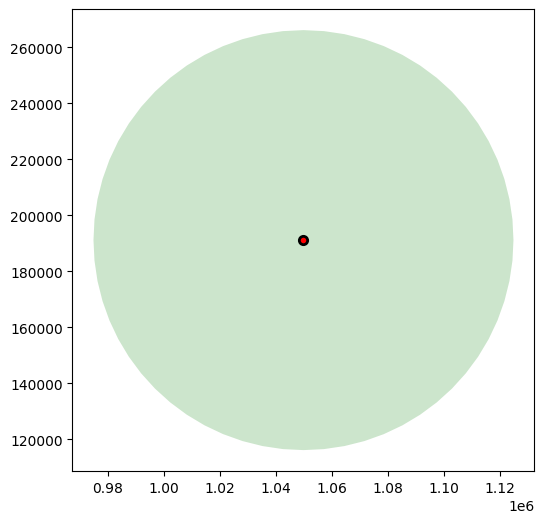

In [204]:
# Visualize

f, ax = plt.subplots (1, 1, figsize=(6, 6))

gdf_ngh_local_buffer.plot(color = 'green', 
                          ax = ax, 
                          alpha = 0.2)

gdf_ngh_local.plot(color = 'red', 
                   ax = ax, 
                   edgecolor = 'k', 
                   linewidth=2)

tree_count = len(gdf_new_join['tree_id'].unique())

print(f'Distance: {distance} feet')

print(f'Tree count: {tree_count}')

print('Distance')

#### The End ####

In [198]:
# ### Alternative World Map

# import math

# # Load built in world map dataset

# # The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. 
# # You can get the original 'naturalearth_lowres' data from 
# # https://www.naturalearthdata.com/downloads/110m-cultural-vectors/

# world = silas.read_file(silas.datasets.get_path('naturalearth_lowres'))

# # Create a copy 

# world_modified = world.copy()

# # Compute the area of each country and take the log of the areas

# areas = [g.area for g in world_modified.geometry.to_list()]
# areas_logs = [math.log(a) for a in areas]

# # Update the geometry column by turning each geeometry into its centroid then buffer it

# world_modified['geometry'] = [g.centroid.buffer(areas_logs[idx]) for idx, g in enumerate(world_modified.geometry.to_list())]

# # Plot the original and the modified world map

# f, ax = plt.subplots(1, 1, figsize=(10, 6))

# world.plot(ax = ax,
#           color = 'none',
#           edgecolor = 'k',
#           linewidth = 1, 
#           alpha = 0.1)

# world_modified.plot(ax = ax,
#                     column = 'continent',
#                     cmap = 'tab20')

# plt.show()

In [175]:

# from pytube import YouTube
# import requests
# from bs4 import BeautifulSoup

In [176]:

# # create a YouTube object
# video = YouTube('https://www.youtube.com/watch?v=mgpzsHVkS9E&list=RD9ooC1a-oQjo&index=4')

# # Download the highest resolution version of the video
# video.streams.get_highest_resolution().download()

# print('Download complete!')

In [177]:
# from pytube import YouTube
# proxies = {"http": "http://your_proxy_address", "https": "http://your_proxy_address"}
# video = YouTube('https://www.youtube.com/watch?v=mgpzsHVkS9E', proxies=proxies)
# video.streams.get_highest_resolution().download()


In [178]:
# # Proven to download from youtube

# import subprocess

# url = 'https://www.youtube.com/watch?v=WNlXR6llLew'
# subprocess.run(['yt-dlp', url])
